# Getting started

The epidatpy package provides access to all the endpoints of the [Delphi Epidata
API](https://cmu-delphi.github.io/delphi-epidata/), and can be used to make
requests for specific signals on specific dates and in select geographic
regions.

## Basic usage

Fetching data from the Delphi Epidata API is simple. Suppose we are
interested in the [covidcast endpoint](https://cmu-delphi.github.io/delphi-epidata/api/covidcast.html),
which provides access to a [wide range of data](https://cmu-delphi.github.io/delphi-epidata/api/covidcast_signals.html)
on COVID-19. Reviewing the endpoint documentation, we see that we
[need to specify](https://cmu-delphi.github.io/delphi-epidata/api/covidcast.html#constructing-api-queries)
a data source name, a signal name, a geographic level, a time resolution, and
the location and times of interest.

The `pub_covidcast` function lets us access the `covidcast` endpoint. Here we
demonstrate how to fetch the most up-to-date version of the confirmed cumulative COVID cases
from the JHU CSSE data source at the national level.

In [1]:
# Hidden cell (set in the metadata for this cell)
import pandas as pd

# Set common options and context
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 10)
pd.set_option("display.width", 1000)

In [2]:
from epidatpy import CovidcastEpidata, EpiDataContext, EpiRange

# Create the client object. Note that due to the arguments below all results
# will be cached to your disk for 7 days, which helps avoid making repeated
# downloads.
epidata = EpiDataContext(use_cache=True, cache_max_age_days=7)

# `pub_covidcast` returns an `EpiDataCall`, which is a not-yet-executed query
# that can be inspected.
apicall = epidata.pub_covidcast(
    data_source="jhu-csse",
    signals="confirmed_cumulative_num",
    geo_type="nation",
    time_type="day",
    geo_values="us",
    time_values=EpiRange(20210405, 20210410),
)
print(apicall)
# The query can be executed and converted to a DataFrame by using the `.df()`
# method:
apicall.df()

EpiDataCall(endpoint=covidcast/, params={'data_source': 'jhu-csse', 'signals': 'confirmed_cumulative_num', 'geo_type': 'nation', 'time_type': 'day', 'geo_values': 'us', 'time_values': '20210405-20210410'})


,source,signal,geo_type,geo_value,time_type,time_value,issue,lag,value,stderr,sample_size,direction,missing_value,missing_stderr,missing_sample_size
0,jhu-csse,confirmed_cumulative_num,nation,us,day,2021-04-05,2023-03-10,704,30874278.0,<NA>,<NA>,<NA>,0,5,5
1,jhu-csse,confirmed_cumulative_num,nation,us,day,2021-04-06,2023-03-10,703,30937664.0,<NA>,<NA>,<NA>,0,5,5
2,jhu-csse,confirmed_cumulative_num,nation,us,day,2021-04-07,2023-03-10,702,31013399.0,<NA>,<NA>,<NA>,0,5,5
3,jhu-csse,confirmed_cumulative_num,nation,us,day,2021-04-08,2023-03-10,701,31093208.0,<NA>,<NA>,<NA>,0,5,5
4,jhu-csse,confirmed_cumulative_num,nation,us,day,2021-04-09,2023-03-10,700,31177602.0,<NA>,<NA>,<NA>,0,5,5
5,jhu-csse,confirmed_cumulative_num,nation,us,day,2021-04-10,2023-03-10,699,31247947.0,<NA>,<NA>,<NA>,0,5,5


In [3]:
# Create the pub_covidcast-specific client object. This you to find what sources
# and signals are available without leaving your REPL.
covidcast = CovidcastEpidata(use_cache=True, cache_max_age_days=7)
# Get a list of all the sources available in the pub_covidcast endpoint.
print(covidcast.source_names())
print(covidcast.signal_names("jhu-csse"))
# Obtain the same data as above with a different interface.
covidcast["jhu-csse", "confirmed_cumulative_num"].call(
    "nation",
    "us",
    EpiRange(20210405, 20210410),
).df()
# See the "Finding data of interest" notebook for more features of this interface.

['chng', 'covid-act-now', 'doctor-visits', 'fb-survey', 'google-symptoms', 'hhs', 'hospital-admissions', 'indicator-combination-cases-deaths', 'jhu-csse', 'safegraph-weekly', 'usa-facts', 'ght', 'google-survey', 'indicator-combination-nmf', 'safegraph-daily', 'nchs-mortality', 'dsew-cpr', 'nssp']
['confirmed_cumulative_num', 'confirmed_7dav_incidence_num', 'confirmed_7dav_incidence_prop', 'confirmed_cumulative_prop', 'confirmed_incidence_num', 'confirmed_incidence_prop', 'deaths_cumulative_num', 'deaths_7dav_incidence_num', 'deaths_7dav_incidence_prop', 'deaths_cumulative_prop', 'deaths_incidence_num', 'deaths_incidence_prop']


,source,signal,geo_type,geo_value,time_type,time_value,issue,lag,value,stderr,sample_size,direction,missing_value,missing_stderr,missing_sample_size
0,jhu-csse,confirmed_cumulative_num,nation,us,day,2021-04-05,2023-03-10,704,30874278.0,<NA>,<NA>,<NA>,0,5,5
1,jhu-csse,confirmed_cumulative_num,nation,us,day,2021-04-06,2023-03-10,703,30937664.0,<NA>,<NA>,<NA>,0,5,5
2,jhu-csse,confirmed_cumulative_num,nation,us,day,2021-04-07,2023-03-10,702,31013399.0,<NA>,<NA>,<NA>,0,5,5
3,jhu-csse,confirmed_cumulative_num,nation,us,day,2021-04-08,2023-03-10,701,31093208.0,<NA>,<NA>,<NA>,0,5,5
4,jhu-csse,confirmed_cumulative_num,nation,us,day,2021-04-09,2023-03-10,700,31177602.0,<NA>,<NA>,<NA>,0,5,5
5,jhu-csse,confirmed_cumulative_num,nation,us,day,2021-04-10,2023-03-10,699,31247947.0,<NA>,<NA>,<NA>,0,5,5


Each row represents one observation in the US on one
day. The geographical abbreviation is given in the `geo_value` column, the date in
the `time_value` column. Here `value` is the requested signal -- in this
case, the smoothed estimate of the percentage of people with COVID-like
illness, based on the symptom surveys, and `stderr` is its standard error.

The Epidata API makes signals available at different geographic levels,
depending on the endpoint. To request signals for all states instead of the
entire US, we use the `geo_type` argument paired with `*` for the
`geo_values` argument. (Only some endpoints allow for the use of `*` to
access data at all locations. Check the help for a given endpoint to see if
it supports `*`.)

In [4]:
epidata.pub_covidcast(
    data_source="fb-survey",
    signals="smoothed_cli",
    geo_type="state",
    time_type="day",
    geo_values="*",
    time_values=EpiRange(20210405, 20210410),
).df()

,source,signal,geo_type,geo_value,time_type,time_value,issue,lag,value,stderr,sample_size,direction,missing_value,missing_stderr,missing_sample_size
0,fb-survey,smoothed_cli,state,ak,day,2021-04-05,2021-04-10,5,0.736883,0.275805,720.0,<NA>,0,0,0
1,fb-survey,smoothed_cli,state,al,day,2021-04-05,2021-04-10,5,0.796627,0.137734,3332.1117,<NA>,0,0,0
2,fb-survey,smoothed_cli,state,ar,day,2021-04-05,2021-04-10,5,0.561916,0.131108,2354.9911,<NA>,0,0,0
3,fb-survey,smoothed_cli,state,az,day,2021-04-05,2021-04-10,5,0.62283,0.105354,4742.2778,<NA>,0,0,0
4,fb-survey,smoothed_cli,state,ca,day,2021-04-05,2021-04-10,5,0.444169,0.040576,21382.3806,<NA>,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301,fb-survey,smoothed_cli,state,vt,day,2021-04-10,2021-04-15,5,0.496408,0.237163,789.0011,<NA>,0,0,0
302,fb-survey,smoothed_cli,state,wa,day,2021-04-10,2021-04-15,5,0.573955,0.082897,6378.9502,<NA>,0,0,0
303,fb-survey,smoothed_cli,state,wi,day,2021-04-10,2021-04-15,5,0.552162,0.093652,4802.9953,<NA>,0,0,0
304,fb-survey,smoothed_cli,state,wv,day,2021-04-10,2021-04-15,5,0.726741,0.173248,2034.1066,<NA>,0,0,0


Alternatively, we can fetch the full time series for a subset of states by 
listing out the desired locations in the `geo_value` argument and using
`*` in the `time_values` argument:

In [5]:
epidata.pub_covidcast(
    data_source="fb-survey",
    signals="smoothed_cli",
    geo_type="state",
    time_type="day",
    geo_values="pa,ca,fl",
    time_values="*",
).df()

,source,signal,geo_type,geo_value,time_type,time_value,issue,lag,value,stderr,sample_size,direction,missing_value,missing_stderr,missing_sample_size
0,fb-survey,smoothed_cli,state,ca,day,2020-04-06,2020-09-03,150,0.727647,0.136668,3116.6652,<NA>,0,0,0
1,fb-survey,smoothed_cli,state,fl,day,2020-04-06,2020-09-03,150,0.605006,0.126229,2657.0001,<NA>,0,0,0
2,fb-survey,smoothed_cli,state,pa,day,2020-04-06,2020-09-03,150,0.852422,0.138715,3299.0016,<NA>,0,0,0
3,fb-survey,smoothed_cli,state,ca,day,2020-04-07,2020-09-03,149,0.672257,0.073444,9616.9951,<NA>,0,0,0
4,fb-survey,smoothed_cli,state,fl,day,2020-04-07,2020-09-03,149,0.705451,0.070535,10420.0016,<NA>,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2434,fb-survey,smoothed_cli,state,fl,day,2022-06-26,2022-06-28,2,3.606007,0.197311,7184.0002,<NA>,0,0,0
2435,fb-survey,smoothed_cli,state,pa,day,2022-06-26,2022-06-28,2,2.046306,0.195172,4194.0018,<NA>,0,0,0
2436,fb-survey,smoothed_cli,state,ca,day,2022-06-27,2022-06-28,1,3.368872,0.1838,7719.148,<NA>,0,0,0
2437,fb-survey,smoothed_cli,state,fl,day,2022-06-27,2022-06-28,1,3.740106,0.219306,5990.0001,<NA>,0,0,0


## Getting versioned data

The Epidata API stores a historical record of all data, including corrections
and updates, which is particularly useful for accurately backtesting
forecasting models. To fetch versioned data, we can use the `as_of`
argument:

In [6]:
epidata.pub_covidcast(
    data_source="fb-survey",
    signals="smoothed_cli",
    geo_type="state",
    time_type="day",
    geo_values="pa",
    time_values=EpiRange(20210405, 20210410),
    as_of="2021-06-01",
).df()

,source,signal,geo_type,geo_value,time_type,time_value,issue,lag,value,stderr,sample_size,direction,missing_value,missing_stderr,missing_sample_size
0,fb-survey,smoothed_cli,state,pa,day,2021-04-05,2021-04-10,5,0.715758,0.072999,10894.0057,<NA>,0,0,0
1,fb-survey,smoothed_cli,state,pa,day,2021-04-06,2021-04-11,5,0.69321,0.070869,10862.0055,<NA>,0,0,0
2,fb-survey,smoothed_cli,state,pa,day,2021-04-07,2021-04-12,5,0.685934,0.070654,10790.0054,<NA>,0,0,0
3,fb-survey,smoothed_cli,state,pa,day,2021-04-08,2021-04-13,5,0.681511,0.071394,10731.0044,<NA>,0,0,0
4,fb-survey,smoothed_cli,state,pa,day,2021-04-09,2021-04-14,5,0.709416,0.072162,10590.0049,<NA>,0,0,0
5,fb-survey,smoothed_cli,state,pa,day,2021-04-10,2021-04-15,5,0.77624,0.076037,10492.0055,<NA>,0,0,0


## Plotting

Because the output data is a standard Pandas DataFrame, we can easily plot
it using any of the available Python libraries:

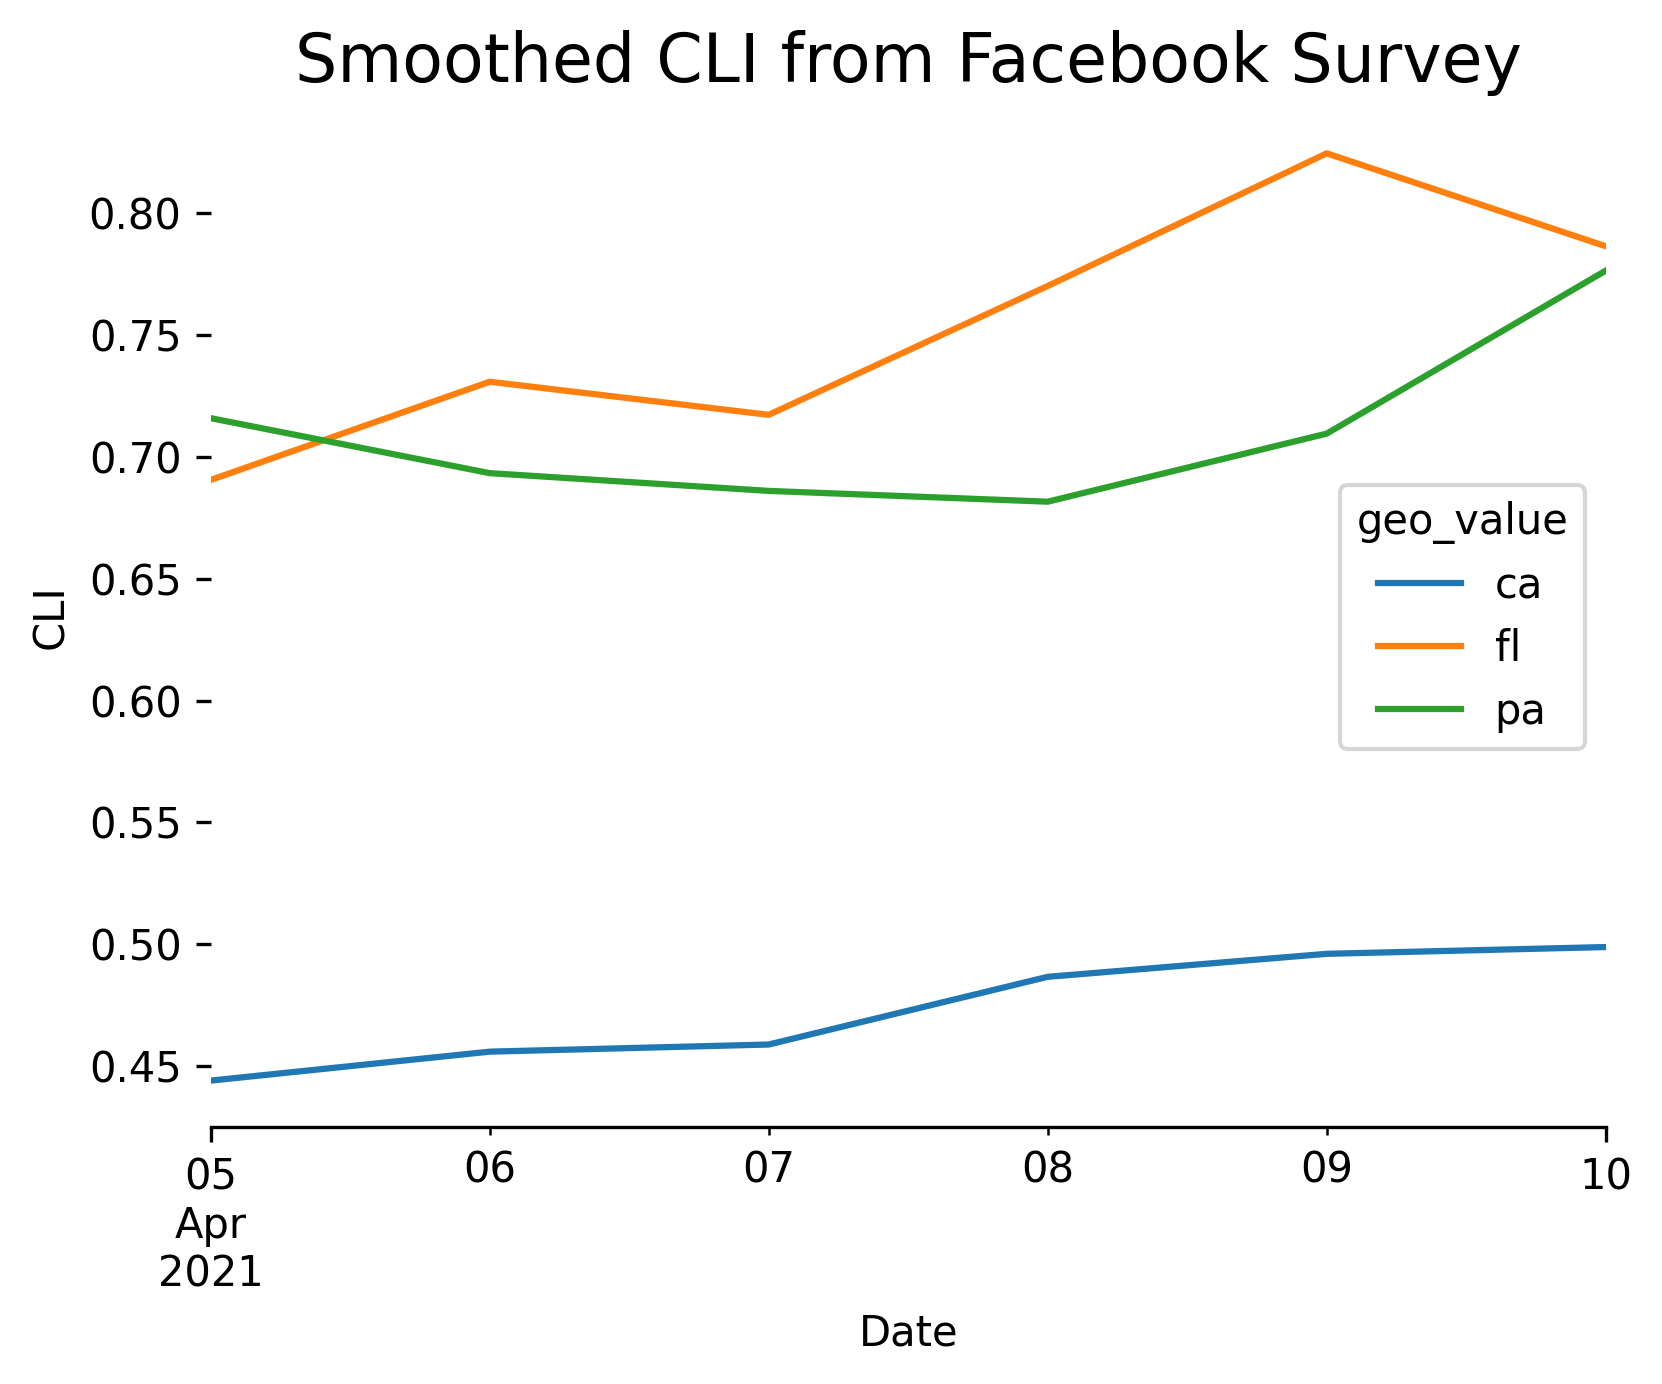

In [7]:
import matplotlib.pyplot as plt

plt.rcParams["figure.dpi"] = 300

apicall = epidata.pub_covidcast(
    data_source="fb-survey",
    signals="smoothed_cli",
    geo_type="state",
    geo_values="pa,ca,fl",
    time_type="day",
    time_values=EpiRange(20210405, 20210410),
)

fig, ax = plt.subplots(figsize=(6, 5))
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["top"].set_visible(False)

(
    apicall.df()
    .pivot_table(values="value", index="time_value", columns="geo_value")
    .plot(xlabel="Date", ylabel="CLI", ax=ax, linewidth=1.5)
)

plt.title("Smoothed CLI from Facebook Survey", fontsize=16)
plt.subplots_adjust(bottom=0.2)
plt.show()

## Finding locations of interest

Most data is only available for the US. Select endpoints report other countries at the national and/or regional levels. Endpoint descriptions explicitly state when they cover non-US locations.

For endpoints that report US data, see the
[geographic coding documentation](https://cmu-delphi.github.io/delphi-epidata/api/covidcast_geography.html)
for available geographic levels.

## International data

International data is available via

- `pub_dengue_nowcast` (North and South America)
- `pub_ecdc_ili` (Europe)
- `pub_kcdc_ili` (Korea)
- `pub_nidss_dengue` (Taiwan)
- `pub_nidss_flu` (Taiwan)
- `pub_paho_dengue` (North and South America)
- `pvt_dengue_sensors` (North and South America)

## Finding data sources and signals of interest

Above we used data from [Delphi’s symptom surveys](https://delphi.cmu.edu/covid19/ctis/),
but the Epidata API includes numerous data streams: medical claims data, cases
and deaths, mobility, and many others. This can make it a challenge to find
the data stream that you are most interested in.

The Epidata documentation lists all the data sources and signals available
through the API for [COVID-19](https://cmu-delphi.github.io/delphi-epidata/api/covidcast_signals.html)
and for [other diseases](https://cmu-delphi.github.io/delphi-epidata/api/README.html#source-specific-parameters).

## Epiweeks and dates

Formatting for epiweeks is YYYYWW and for dates is YYYYMMDD.

Epiweeks use the U.S. CDC definition, which defines the first epiweek each year
to be the first week containing January 4th and the start of the week is on
Sunday. See [this
page](https://www.cmmcp.org/mosquito-surveillance-data/pages/epi-week-calendars-2008-2021)
for a less terse explanation. 

When specifying the time_values argument, you can use individual values,
comma-separated lists or, a hyphenated range of values to specify single or
several dates (or epiweeks). An `EpiRange` object can be also used to construct
a range of epiweeks or dates. Examples include:

- `param = 201530` (A single epiweek)
- `param = '201401,201501,201601'` (Several epiweeks)
- `param = '200501-200552'` (A range of epiweeks)
- `param = '201440,201501-201510'` (Several epiweeks, including a range)
- `param = EpiRange(20070101, 20071231)` (A range of dates)
